<a href="https://colab.research.google.com/github/Bhushan21794/Hotel-Booking-Analysis/blob/main/Bhushan_Ahire_Hotel_Booking_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Hotel_booking = pd.read_csv("/content/drive/MyDrive/EDA Project/Hotel Bookings.csv")

In [ ]:
Hotel_booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
Hotel_booking.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
Hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
Hotel_booking.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
Hotel_booking.shape

(119390, 32)

Data Cleaning

In [ ]:
Hotel_booking.isnull().sum().sort_values(ascending=False)[0:5]

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
dtype: int64

In [ ]:
Hotel_booking['company'].fillna(0,inplace=True)
Hotel_booking['agent'].fillna(0,inplace=True)
Hotel_booking['country'].fillna('others',inplace=True)
Hotel_booking['children'].fillna(0,inplace=True)


In [ ]:
Hotel_booking.isnull().sum().sort_values(ascending=False)[0:5]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
dtype: int64

In [ ]:
Hotel_booking.duplicated().value_counts()

False    87396
True     31994
dtype: int64

In [ ]:
Hotel_booking.drop_duplicates(inplace=True)

In [ ]:
Hotel_booking.duplicated().value_counts()

False    87396
dtype: int64

In [ ]:
Hotel_booking.shape

(87396, 32)

# Question 1 - Which hotel is mostly prefered for bookings .

In [ ]:
Q1 = Hotel_booking['hotel'].value_counts()

In [ ]:
Q1 

City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64

Text(0, 0.5, 'Bookings')

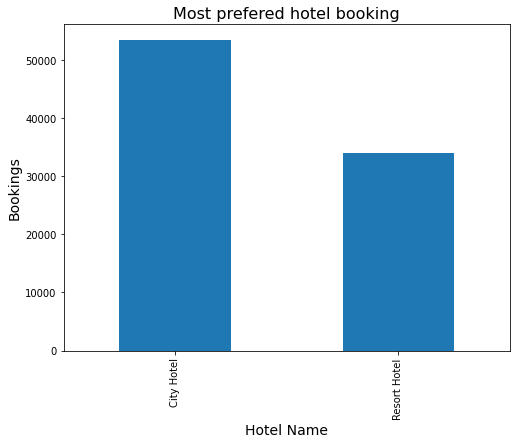

In [ ]:
plt.figure(figsize=(8,6))
Q1.plot.bar()
plt.title('Most prefered hotel booking', fontsize = 16)
plt.xlabel('Hotel Name',fontsize = 14)
plt.ylabel('Bookings', fontsize = 14)

# **INFERENCE** :

As we can see from above chart city hotels are mostly prefered by peoples while booking hotels.








# Question 2 - Which is the best arrival period in the year when maximum bookings are done by guest.

In [ ]:
Q2 = Hotel_booking['arrival_date_month'].value_counts()

In [ ]:
Q2

August       11257
July         10057
May           8355
April         7908
June          7765
March         7513
October       6934
September     6690
February      6098
December      5131
November      4995
January       4693
Name: arrival_date_month, dtype: int64

Text(0, 0.5, 'Bookings')

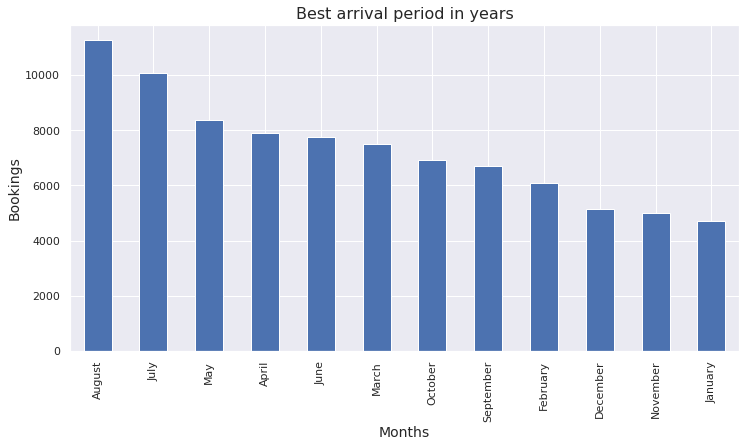

In [ ]:
Q2.plot(figsize=(12,6),kind = 'bar',)
plt.title('Best arrival period in years', fontsize = 16)
plt.xlabel('Months' , fontsize = 14)
plt.ylabel('Bookings' , fontsize = 14)




# **INFERENCE :**

For year 2015,2016,2017 Month of August is mostly arrival period followed by months July and May. 



# Question 3 - Which type of meal highly ordered by guests.

In [ ]:
Q3 = Hotel_booking['meal'].value_counts()

In [ ]:
Q3

BB           67978
SC            9481
HB            9085
Undefined      492
FB             360
Name: meal, dtype: int64

In [ ]:
Q3 = (Q3/sum(Q3))*100

In [ ]:
Q3

BB           77.781592
SC           10.848323
HB           10.395213
Undefined     0.562955
FB            0.411918
Name: meal, dtype: float64

Text(0, 0.5, 'Ordered percentage (%)')

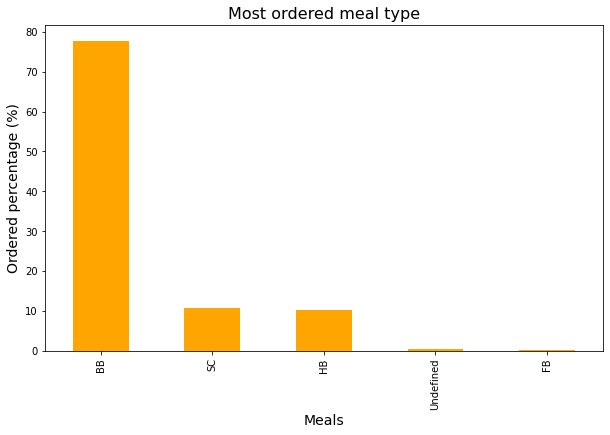

In [ ]:
Q3.plot(figsize=(10,6), color= 'orange', kind = 'bar')
plt.title('Most ordered meal type', fontsize = 16)
plt.xlabel('Meals' , fontsize = 14)
plt.ylabel('Ordered percentage (%)' , fontsize = 14)

# **INFERENCE :**

From above analysis we can see that BB type meal mostly ordered by guest followed by SC & HB type meal



# Question 4 = From which countries most of the guest visit these hotels.

In [ ]:
X = Hotel_booking.country.value_counts().head(10).index

In [ ]:
Y = list(Hotel_booking['country'].value_counts().head(10))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'country wise hotel bookings')

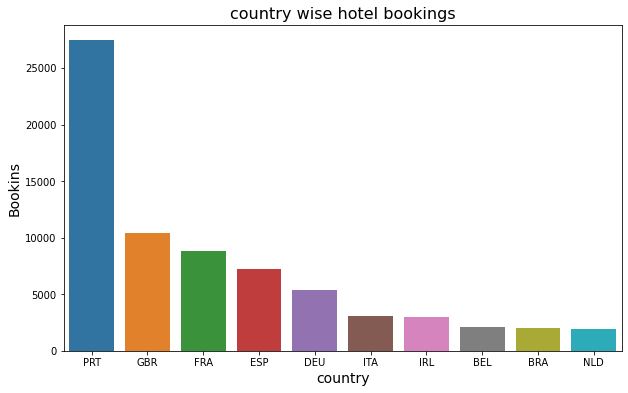

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(X,Y)
plt.xlabel('country', fontsize=14)
plt.ylabel('Bookins', fontsize=14)
plt.title('country wise hotel bookings', fontsize=16)

# **INFERENCE** :

PRT, GBR, FRA, ESP & DEU are the top countries from most guests come.



# Question 5 = Which room type mostly prefered by guests while booking.

([<matplotlib.patches.Wedge at 0x7f26b082b7d0>,
 [Text(-0.4903705211421061, 0.9846505735512571, 'A'),
  Text(-0.023406598470999195, -1.0997509405079031, 'D'),
  Text(0.8054305638089612, -0.7491872975981233, 'E'),
  Text(0.9997168516050908, -0.45887494659962097, 'F'),
  Text(1.0644081869957316, -0.27755217789896663, 'G'),
  Text(1.0883921871151159, -0.15938145132597592, 'B'),
  Text(1.0967742361781732, -0.08418001458650906, 'C'),
  Text(1.0997268253851176, -0.024513456067458857, 'H'),
  Text(1.0999997698170958, -0.000711619516746181, 'L'),
  Text(1.0999999744419313, -0.00023712391418415213, 'P')],
 [Text(-0.26747482971387604, 0.5370821310279583, '64.7%'),
  Text(-0.012767235529635924, -0.5998641493679471, '19.9%'),
  Text(0.43932576207761515, -0.4086476168717036, '6.9%'),
  Text(0.5453001008755041, -0.25029542541797506, '3.2%'),
  Text(0.5805862838158535, -0.15139209703579995, '2.3%'),
  Text(0.5936684656991541, -0.08693533708689595, '1.1%'),
  Text(0.5982404924608217, -0.04591637159264

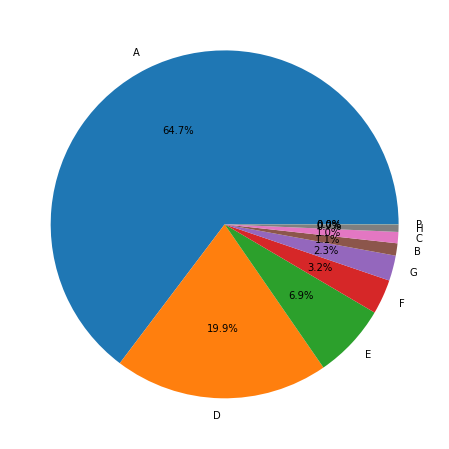

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(Hotel_booking['reserved_room_type'].value_counts(), labels = Hotel_booking['reserved_room_type'].value_counts().index, autopct = '%0.1f%%')


# **INFERENCE** : 

From Above analysis we can see that room type A IS mostly preferred by guests while booking hotels followed by room type D & room type E. Room type A selected by almost 64% Guests.



# Question 6 = Mostly used distribution channel for hotel booking.

In [ ]:
Q6 = Hotel_booking.distribution_channel.value_counts()

In [ ]:
Q6

TA/TO        69141
Direct       12988
Corporate     5081
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64

Text(0.5, 1.0, 'Distribution_channel')

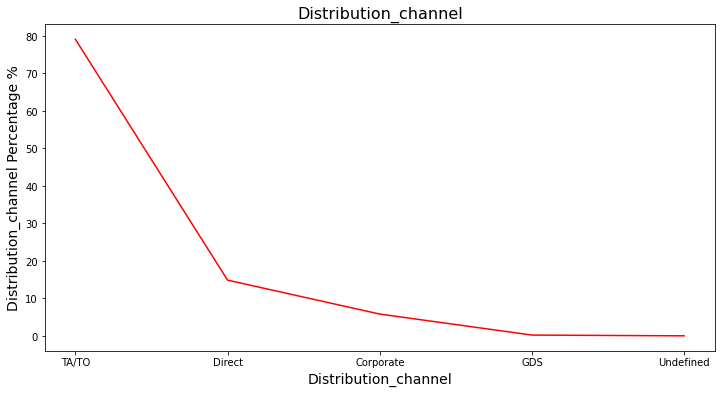

In [ ]:
plt.figure(figsize = (12,6))
plt.plot((Q6/Q6.sum())*100,'r')
plt.xlabel('Distribution_channel', fontsize=14)
plt.ylabel('Distribution_channel Percentage %', fontsize=14)
plt.title('Distribution_channel', fontsize=16)

# **INFERENCE** :

Here we can see that the most of guests are making reservations through TA/TO channel which is travel agency and tour operator. Followed by direct channel & Corporate channel.



# Question 7 = What is percentage of booking cancellation by hotel types.

In [ ]:
Q7 = Hotel_booking.groupby("hotel")['is_canceled'].describe()

In [ ]:
Q7

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,53428.0,0.300386,0.458430,0.0,0.0,0.0,1.0,1.0
Resort Hotel,33968.0,0.234809,0.423886,0.0,0.0,0.0,0.0,1.0


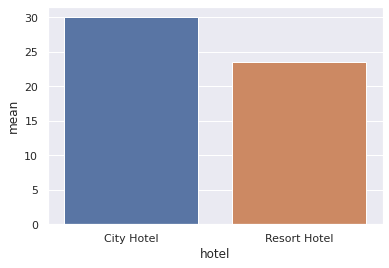

In [ ]:
sns.barplot(x=Q7.index, y=Q7["mean"]*100)

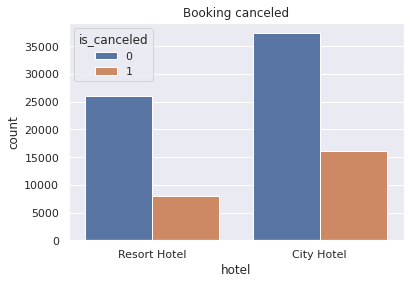

In [ ]:
sns.set(style = 'darkgrid')
plt.title("Booking canceled")
Q7 = sns.countplot(x='hotel' , hue='is_canceled' , data=Hotel_booking)

# **INFERENCE** :

Around 40% bookings were cancelled in city hotels and 30% in resort hotels.



# Question 8 = What is the relationship between market segments and booking cancellation.

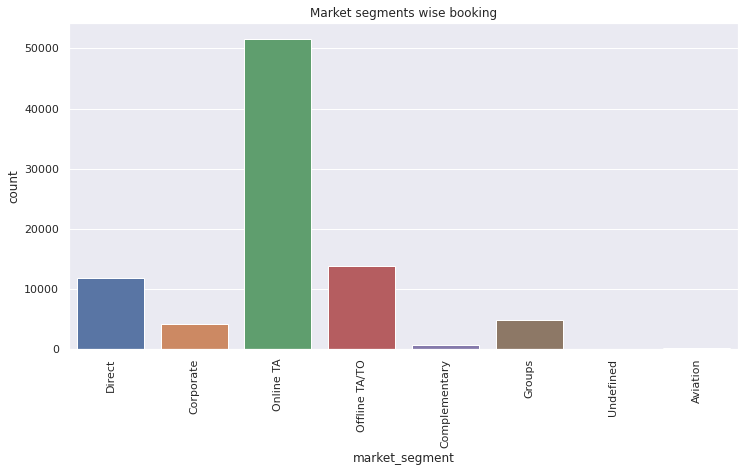

In [ ]:
plt.figure(figsize = (12,6))
plt.title("Market segments wise booking")
Q8 = sns.countplot(x="market_segment" , data = Hotel_booking )
plt.xticks(rotation = 90)
plt.show()

# **INFERENCE** :
Bookings through online TA And offline TA/TO are higher followed by direct bookings and groups booking. 

# Now lets find relationship between market segments and booking cancellation

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

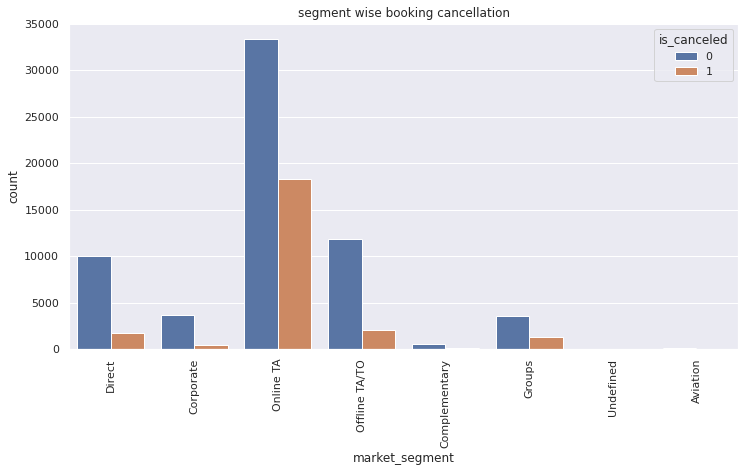

In [ ]:
plt.figure(figsize = (12,6))
plt.title("segment wise booking cancellation")
sns.countplot(x= 'market_segment' , data = Hotel_booking , hue = 'is_canceled')
plt.xticks(rotation = 90)


# **INFERENCE** :

From above we can see that most of bookings were canceled in Online TA followed by Offline TA/TO , Direct bookings and Groups bookings.



# **CONCLUSION** : 

**.** Around 60% bookings are for city hotel & 40% bookings for resort hotel, 
therefore city hotel is busier than resort hotel.

**.** July & August are the most busier months in years for both hotels. April to August is the peak season of bookings.

**.** BB type meal mostly prefered for ordering food followed by SC type meal & FB is least prefered meal by guests. 

**.** Maximum number of guests came from PRT i.e more than 25000. After PRT 
GBR and FRA are countries from where most of the guests came.

**.** Room type A is selected by almost 64% guests & room type D & E selected by 20% and 7% guests respectively.Room type A generating most revenue for hotels.

**.** Guests use different distribution channels for making bookings out of which most prefered way is TA/TO.

**.** Both hotels have significantly higher booking cancellation , Arount 40% of bookings were cancelled in city hotels & 30% bookings were cancelled in resort hotels.

**.** Cancellations are high when done through Online TA compared to direct bookings.Hotels need to do marketing and give special incentives for direct bookings. 


